In [16]:
#!/usr/bin/python

In [17]:
import sqlite3
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [18]:
conn = sqlite3.connect('/home/bosch/simran/JaP_mains.db')
df = pd.read_sql_query("Select id, time, activepower, realtime_e, meter_id from RS485SAMPLES where meter_id = 3;", conn)
print (df)

            ID                 TIME  ACTIVEPOWER   REALTIME_E  METER_ID
0       140863  2018-02-13 11:56:57    1672000.0  932678359.0         3
1       140868  2018-02-13 11:57:57    1706000.0  932706149.0         3
2       140873  2018-02-13 12:01:18    1799000.0  932805763.0         3
3       140878  2018-02-13 12:02:18    1756000.0  932835063.0         3
4       140883  2018-02-13 12:03:18    1818000.0  932865060.0         3
5       140888  2018-02-13 12:04:18    1746000.0  932894392.0         3
6       140893  2018-02-13 12:05:18    1647000.0  932923248.0         3
7       140898  2018-02-13 12:06:18    1748000.0  932951506.0         3
8       140903  2018-02-13 12:07:18    1734000.0  932980879.0         3
9       140908  2018-02-13 12:08:18    1801000.0  933010343.0         3
10      140913  2018-02-13 12:09:18    1778000.0  933039852.0         3
11      140918  2018-02-13 12:10:18    1810000.0  933069722.0         3
12      140923  2018-02-13 12:11:18    1710000.0  933098833.0   

In [19]:
print (df.shape)
var1 = df['TIME'] == ""
df1 = df[var1]
print (df1)

(135141, 5)
Empty DataFrame
Columns: [ID, TIME, ACTIVEPOWER, REALTIME_E, METER_ID]
Index: []


In [21]:
var = df['TIME'] != ""
df = df[var]
df = df.reset_index()
del df['index']
df

,ID,TIME,ACTIVEPOWER,REALTIME_E,METER_ID
0,140863,2018-02-13 11:56:57,1672000.0,932678359.0,3
1,140868,2018-02-13 11:57:57,1706000.0,932706149.0,3
2,140873,2018-02-13 12:01:18,1799000.0,932805763.0,3
3,140878,2018-02-13 12:02:18,1756000.0,932835063.0,3
4,140883,2018-02-13 12:03:18,1818000.0,932865060.0,3
5,140888,2018-02-13 12:04:18,1746000.0,932894392.0,3
6,140893,2018-02-13 12:05:18,1647000.0,932923248.0,3
7,140898,2018-02-13 12:06:18,1748000.0,932951506.0,3
8,140903,2018-02-13 12:07:18,1734000.0,932980879.0,3
9,140908,2018-02-13 12:08:18,1801000.0,933010343.0,3


In [22]:
mask = df['TIME'] > '2018-03-01 00:00:00'
df = df.loc[mask]
df

,ID,TIME,ACTIVEPOWER,REALTIME_E,METER_ID
721,144468,2018-02-14 00:00:18,1433000.0,953510885.0,3
722,144473,2018-02-14 00:01:18,1484000.0,953535249.0,3
723,144478,2018-02-14 00:02:18,1488000.0,953560287.0,3
724,144483,2018-02-14 00:03:18,1531000.0,953586036.0,3
725,144488,2018-02-14 00:04:18,1535000.0,953611629.0,3
726,144493,2018-02-14 00:05:18,1518000.0,953636911.0,3
727,144498,2018-02-14 00:06:18,1533000.0,953662717.0,3
728,144503,2018-02-14 00:07:18,1451000.0,953687821.0,3
729,144508,2018-02-14 00:08:18,1433000.0,953712476.0,3
730,144513,2018-02-14 00:09:18,1413000.0,953736277.0,3


In [7]:
mask = (df['ACTIVEPOWER'] < 3000000) & (df['ACTIVEPOWER'] > 10000) #check
df = df.loc[mask]
df

,ID,TIME,ACTIVEPOWER,REALTIME_E,METER_ID
37791,252468,2018-03-01 00:00:18,1371000.0,1.518211e+09,3
37792,252473,2018-03-01 00:01:18,1301000.0,1.518233e+09,3
37793,252478,2018-03-01 00:02:18,1242000.0,1.518255e+09,3
37794,252483,2018-03-01 00:03:18,1263000.0,1.518276e+09,3
37795,252488,2018-03-01 00:04:18,1282000.0,1.518297e+09,3
37796,252493,2018-03-01 00:05:18,1240000.0,1.518319e+09,3
37797,252498,2018-03-01 00:06:18,1343000.0,1.518340e+09,3
37798,252503,2018-03-01 00:07:18,1351000.0,1.518362e+09,3
37799,252508,2018-03-01 00:08:18,1343000.0,1.518385e+09,3
37800,252513,2018-03-01 00:09:18,1324000.0,1.518408e+09,3


In [8]:
mask = df['REALTIME_E'] < 20000000000
df = df.loc[mask]
df

,ID,TIME,ACTIVEPOWER,REALTIME_E,METER_ID
37791,252468,2018-03-01 00:00:18,1371000.0,1.518211e+09,3
37792,252473,2018-03-01 00:01:18,1301000.0,1.518233e+09,3
37793,252478,2018-03-01 00:02:18,1242000.0,1.518255e+09,3
37794,252483,2018-03-01 00:03:18,1263000.0,1.518276e+09,3
37795,252488,2018-03-01 00:04:18,1282000.0,1.518297e+09,3
37796,252493,2018-03-01 00:05:18,1240000.0,1.518319e+09,3
37797,252498,2018-03-01 00:06:18,1343000.0,1.518340e+09,3
37798,252503,2018-03-01 00:07:18,1351000.0,1.518362e+09,3
37799,252508,2018-03-01 00:08:18,1343000.0,1.518385e+09,3
37800,252513,2018-03-01 00:09:18,1324000.0,1.518408e+09,3


In [9]:
df.TIME

37791    2018-03-01 00:00:18
37792    2018-03-01 00:01:18
37793    2018-03-01 00:02:18
37794    2018-03-01 00:03:18
37795    2018-03-01 00:04:18
37796    2018-03-01 00:05:18
37797    2018-03-01 00:06:18
37798    2018-03-01 00:07:18
37799    2018-03-01 00:08:18
37800    2018-03-01 00:09:18
37801    2018-03-01 00:10:18
37802    2018-03-01 00:11:18
37803    2018-03-01 00:12:18
37804    2018-03-01 00:13:18
37805    2018-03-01 00:14:18
37806    2018-03-01 00:15:18
37807    2018-03-01 00:16:18
37808    2018-03-01 00:17:18
37809    2018-03-01 00:18:18
37810    2018-03-01 00:19:18
37811    2018-03-01 00:20:18
37812    2018-03-01 00:21:18
37813    2018-03-01 00:22:18
37814    2018-03-01 00:23:18
37815    2018-03-01 00:24:18
37816    2018-03-01 00:25:18
37817    2018-03-01 00:26:18
37818    2018-03-01 00:27:18
37819    2018-03-01 00:28:18
37820    2018-03-01 00:29:18
                ...         
88705    2018-04-05 08:39:07
88706    2018-04-05 08:40:07
88707    2018-04-05 08:41:07
88708    2018-

In [10]:
df.TIME > ''

37791    True
37792    True
37793    True
37794    True
37795    True
37796    True
37797    True
37798    True
37799    True
37800    True
37801    True
37802    True
37803    True
37804    True
37805    True
37806    True
37807    True
37808    True
37809    True
37810    True
37811    True
37812    True
37813    True
37814    True
37815    True
37816    True
37817    True
37818    True
37819    True
37820    True
         ... 
88705    True
88706    True
88707    True
88708    True
88709    True
88710    True
88711    True
88712    True
88713    True
88714    True
88715    True
88716    True
88717    True
88718    True
88719    True
88720    True
88721    True
88722    True
88723    True
88724    True
88725    True
88726    True
88727    True
88728    True
88729    True
88730    True
88731    True
88732    True
88733    True
88734    True
Name: TIME, Length: 49731, dtype: bool

In [11]:
df[df['TIME'] > '']

,ID,TIME,ACTIVEPOWER,REALTIME_E,METER_ID
37791,252468,2018-03-01 00:00:18,1371000.0,1.518211e+09,3
37792,252473,2018-03-01 00:01:18,1301000.0,1.518233e+09,3
37793,252478,2018-03-01 00:02:18,1242000.0,1.518255e+09,3
37794,252483,2018-03-01 00:03:18,1263000.0,1.518276e+09,3
37795,252488,2018-03-01 00:04:18,1282000.0,1.518297e+09,3
37796,252493,2018-03-01 00:05:18,1240000.0,1.518319e+09,3
37797,252498,2018-03-01 00:06:18,1343000.0,1.518340e+09,3
37798,252503,2018-03-01 00:07:18,1351000.0,1.518362e+09,3
37799,252508,2018-03-01 00:08:18,1343000.0,1.518385e+09,3
37800,252513,2018-03-01 00:09:18,1324000.0,1.518408e+09,3


In [12]:
df['del_E'] = df['REALTIME_E'] - df['REALTIME_E'].shift(1)
df

,ID,TIME,ACTIVEPOWER,REALTIME_E,METER_ID,del_E
37791,252468,2018-03-01 00:00:18,1371000.0,1.518211e+09,3,NaN
37792,252473,2018-03-01 00:01:18,1301000.0,1.518233e+09,3,22046.0
37793,252478,2018-03-01 00:02:18,1242000.0,1.518255e+09,3,21743.0
37794,252483,2018-03-01 00:03:18,1263000.0,1.518276e+09,3,20608.0
37795,252488,2018-03-01 00:04:18,1282000.0,1.518297e+09,3,21534.0
37796,252493,2018-03-01 00:05:18,1240000.0,1.518319e+09,3,21276.0
37797,252498,2018-03-01 00:06:18,1343000.0,1.518340e+09,3,21228.0
37798,252503,2018-03-01 00:07:18,1351000.0,1.518362e+09,3,22690.0
37799,252508,2018-03-01 00:08:18,1343000.0,1.518385e+09,3,22777.0
37800,252513,2018-03-01 00:09:18,1324000.0,1.518408e+09,3,22679.0


In [13]:
df[df['del_E'] < 0]

,ID,TIME,ACTIVEPOWER,REALTIME_E,METER_ID,del_E
38081,253918,2018-03-01 04:50:18,1309000.0,3827.0,3,-1.524632e+09
82754,477283,2018-04-01 05:28:07,1285000.0,7318.0,3,-1.191381e+09


In [14]:
df[df['del_E'] > 300000]

,ID,TIME,ACTIVEPOWER,REALTIME_E,METER_ID,del_E


In [15]:
#df.reset_index()
df.set_index('TIME')
#df['TIME'].resample('H').mean()
#mains_series.resample('H').mean()


,ID,ACTIVEPOWER,REALTIME_E,METER_ID,del_E
TIME,,,,,
2018-03-01 00:00:18,252468,1371000.0,1.518211e+09,3,NaN
2018-03-01 00:01:18,252473,1301000.0,1.518233e+09,3,22046.0
2018-03-01 00:02:18,252478,1242000.0,1.518255e+09,3,21743.0
2018-03-01 00:03:18,252483,1263000.0,1.518276e+09,3,20608.0
2018-03-01 00:04:18,252488,1282000.0,1.518297e+09,3,21534.0
2018-03-01 00:05:18,252493,1240000.0,1.518319e+09,3,21276.0
2018-03-01 00:06:18,252498,1343000.0,1.518340e+09,3,21228.0
2018-03-01 00:07:18,252503,1351000.0,1.518362e+09,3,22690.0
2018-03-01 00:08:18,252508,1343000.0,1.518385e+09,3,22777.0


In [16]:
df['TIME'] = pd.to_datetime(df['TIME'])

In [17]:
df.dtypes

ID                      int64
TIME           datetime64[ns]
ACTIVEPOWER           float64
REALTIME_E            float64
METER_ID                int64
del_E                 float64
dtype: object

In [18]:
df = df.set_index('TIME')
var = df['ACTIVEPOWER']
var

TIME
2018-03-01 00:00:18    1371000.0
2018-03-01 00:01:18    1301000.0
2018-03-01 00:02:18    1242000.0
2018-03-01 00:03:18    1263000.0
2018-03-01 00:04:18    1282000.0
2018-03-01 00:05:18    1240000.0
2018-03-01 00:06:18    1343000.0
2018-03-01 00:07:18    1351000.0
2018-03-01 00:08:18    1343000.0
2018-03-01 00:09:18    1324000.0
2018-03-01 00:10:18    1300000.0
2018-03-01 00:11:18    1302000.0
2018-03-01 00:12:18    1317000.0
2018-03-01 00:13:18    1388000.0
2018-03-01 00:14:18    1405000.0
2018-03-01 00:15:18    1388000.0
2018-03-01 00:16:18    1381000.0
2018-03-01 00:17:18    1481000.0
2018-03-01 00:18:18    1517000.0
2018-03-01 00:19:18    1527000.0
2018-03-01 00:20:18    1538000.0
2018-03-01 00:21:18    1597000.0
2018-03-01 00:22:18    1517000.0
2018-03-01 00:23:18    1515000.0
2018-03-01 00:24:18    1549000.0
2018-03-01 00:25:18    1492000.0
2018-03-01 00:26:18    1486000.0
2018-03-01 00:27:18    1387000.0
2018-03-01 00:28:18    1393000.0
2018-03-01 00:29:18    1398000.0
     

In [19]:
df = df.resample('15Min').mean()
df

,ID,ACTIVEPOWER,REALTIME_E,METER_ID,del_E
TIME,,,,,
2018-03-01 00:00:00,252503.0,1.318133e+06,1.518364e+09,3.0,2.204586e+04
2018-03-01 00:15:00,252578.0,1.477733e+06,1.518718e+09,3.0,2.485813e+04
2018-03-01 00:30:00,252653.0,1.471533e+06,1.519090e+09,3.0,2.463927e+04
2018-03-01 00:45:00,252728.0,1.437533e+06,1.519455e+09,3.0,2.393953e+04
2018-03-01 01:00:00,252803.0,1.333667e+06,1.519801e+09,3.0,2.245047e+04
2018-03-01 01:15:00,252878.0,1.445800e+06,1.520144e+09,3.0,2.389253e+04
2018-03-01 01:30:00,252953.0,1.437667e+06,1.520510e+09,3.0,2.418700e+04
2018-03-01 01:45:00,253028.0,1.326600e+06,1.520861e+09,3.0,2.234313e+04
2018-03-01 02:00:00,253103.0,1.282800e+06,1.521182e+09,3.0,2.102320e+04


In [20]:
df.dropna(inplace=True)

In [21]:
df

,ID,ACTIVEPOWER,REALTIME_E,METER_ID,del_E
TIME,,,,,
2018-03-01 00:00:00,252503.0,1.318133e+06,1.518364e+09,3.0,2.204586e+04
2018-03-01 00:15:00,252578.0,1.477733e+06,1.518718e+09,3.0,2.485813e+04
2018-03-01 00:30:00,252653.0,1.471533e+06,1.519090e+09,3.0,2.463927e+04
2018-03-01 00:45:00,252728.0,1.437533e+06,1.519455e+09,3.0,2.393953e+04
2018-03-01 01:00:00,252803.0,1.333667e+06,1.519801e+09,3.0,2.245047e+04
2018-03-01 01:15:00,252878.0,1.445800e+06,1.520144e+09,3.0,2.389253e+04
2018-03-01 01:30:00,252953.0,1.437667e+06,1.520510e+09,3.0,2.418700e+04
2018-03-01 01:45:00,253028.0,1.326600e+06,1.520861e+09,3.0,2.234313e+04
2018-03-01 02:00:00,253103.0,1.282800e+06,1.521182e+09,3.0,2.102320e+04


In [22]:
df.head(96)

,ID,ACTIVEPOWER,REALTIME_E,METER_ID,del_E
TIME,,,,,
2018-03-01 00:00:00,252503.0,1.318133e+06,1.518364e+09,3.0,2.204586e+04
2018-03-01 00:15:00,252578.0,1.477733e+06,1.518718e+09,3.0,2.485813e+04
2018-03-01 00:30:00,252653.0,1.471533e+06,1.519090e+09,3.0,2.463927e+04
2018-03-01 00:45:00,252728.0,1.437533e+06,1.519455e+09,3.0,2.393953e+04
2018-03-01 01:00:00,252803.0,1.333667e+06,1.519801e+09,3.0,2.245047e+04
2018-03-01 01:15:00,252878.0,1.445800e+06,1.520144e+09,3.0,2.389253e+04
2018-03-01 01:30:00,252953.0,1.437667e+06,1.520510e+09,3.0,2.418700e+04
2018-03-01 01:45:00,253028.0,1.326600e+06,1.520861e+09,3.0,2.234313e+04
2018-03-01 02:00:00,253103.0,1.282800e+06,1.521182e+09,3.0,2.102320e+04


In [23]:
var = df['ACTIVEPOWER']
var

TIME
2018-03-01 00:00:00    1.318133e+06
2018-03-01 00:15:00    1.477733e+06
2018-03-01 00:30:00    1.471533e+06
2018-03-01 00:45:00    1.437533e+06
2018-03-01 01:00:00    1.333667e+06
2018-03-01 01:15:00    1.445800e+06
2018-03-01 01:30:00    1.437667e+06
2018-03-01 01:45:00    1.326600e+06
2018-03-01 02:00:00    1.282800e+06
2018-03-01 02:15:00    1.184400e+06
2018-03-01 02:30:00    1.189333e+06
2018-03-01 02:45:00    1.262333e+06
2018-03-01 03:00:00    1.276133e+06
2018-03-01 03:15:00    1.293133e+06
2018-03-01 03:30:00    1.335467e+06
2018-03-01 03:45:00    1.387800e+06
2018-03-01 04:00:00    1.298733e+06
2018-03-01 04:15:00    1.245200e+06
2018-03-01 04:30:00    1.268933e+06
2018-03-01 04:45:00    1.391733e+06
2018-03-01 05:00:00    1.402533e+06
2018-03-01 05:15:00    1.401800e+06
2018-03-01 05:30:00    1.356867e+06
2018-03-01 05:45:00    1.334933e+06
2018-03-01 06:00:00    1.437733e+06
2018-03-01 06:15:00    1.545600e+06
2018-03-01 06:30:00    1.870267e+06
2018-03-01 06:45:00    

In [24]:
0.80 * 834
667

667

In [25]:
train_data = df.iloc[:667]
train_data

,ID,ACTIVEPOWER,REALTIME_E,METER_ID,del_E
TIME,,,,,
2018-03-01 00:00:00,252503.0,1.318133e+06,1.518364e+09,3.0,2.204586e+04
2018-03-01 00:15:00,252578.0,1.477733e+06,1.518718e+09,3.0,2.485813e+04
2018-03-01 00:30:00,252653.0,1.471533e+06,1.519090e+09,3.0,2.463927e+04
2018-03-01 00:45:00,252728.0,1.437533e+06,1.519455e+09,3.0,2.393953e+04
2018-03-01 01:00:00,252803.0,1.333667e+06,1.519801e+09,3.0,2.245047e+04
2018-03-01 01:15:00,252878.0,1.445800e+06,1.520144e+09,3.0,2.389253e+04
2018-03-01 01:30:00,252953.0,1.437667e+06,1.520510e+09,3.0,2.418700e+04
2018-03-01 01:45:00,253028.0,1.326600e+06,1.520861e+09,3.0,2.234313e+04
2018-03-01 02:00:00,253103.0,1.282800e+06,1.521182e+09,3.0,2.102320e+04


In [26]:
test_data = df.iloc[667:]
test_data

,ID,ACTIVEPOWER,REALTIME_E,METER_ID,del_E
TIME,,,,,
2018-03-08 09:45:00,305823.0,2.053933e+06,2.144550e+08,3.0,34006.133333
2018-03-08 10:00:00,305898.0,1.953800e+06,2.149564e+08,3.0,32577.866667
2018-03-08 10:15:00,305973.0,1.944200e+06,2.154400e+08,3.0,32266.933333
2018-03-08 10:30:00,306048.0,1.882267e+06,2.159188e+08,3.0,31373.733333
2018-03-08 10:45:00,306123.0,1.709467e+06,2.163712e+08,3.0,28772.400000
2018-03-08 11:00:00,306198.0,1.717400e+06,2.167956e+08,3.0,28483.466667
2018-03-08 11:15:00,306273.0,1.684133e+06,2.172183e+08,3.0,28170.400000
2018-03-08 11:30:00,306348.0,1.792400e+06,2.176522e+08,3.0,29715.800000
2018-03-08 11:45:00,306423.0,1.909267e+06,2.181130e+08,3.0,31657.600000


In [27]:
values = df.values
values

array([[2.52503000e+05, 1.31813333e+06, 1.51836399e+09, 3.00000000e+00,
        2.20458571e+04],
       [2.52578000e+05, 1.47773333e+06, 1.51871819e+09, 3.00000000e+00,
        2.48581333e+04],
       [2.52653000e+05, 1.47153333e+06, 1.51908978e+09, 3.00000000e+00,
        2.46392667e+04],
       ...,
       [5.07028000e+05, 2.44120000e+06, 1.62080969e+08, 3.00000000e+00,
        4.06492667e+04],
       [5.07103000e+05, 2.55800000e+06, 1.62708273e+08, 3.00000000e+00,
        4.26840000e+04],
       [5.07163000e+05, 2.56533333e+06, 1.63224685e+08, 3.00000000e+00,
        4.31973333e+04]])

In [28]:
groups = [1, 2, 4]

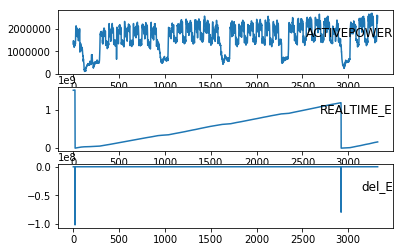

In [29]:
from matplotlib import pyplot

i = 1

pyplot.figure()
for group in groups:
        pyplot.subplot(len(groups), 1, i)
        pyplot.plot(values[:, group])
        pyplot.title(df.columns[group], y=0.5, loc='right')
        i += 1

pyplot.show()

In [30]:
len(df.index.get_duplicates())

/home/bosch/anaconda3/envs/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'get_duplicates' is deprecated and will be removed in a future release. You can use idx[idx.duplicated()].unique() instead
  """Entry point for launching an IPython kernel.


0

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [33]:
tf.__version__

'1.8.0'

In [34]:
df

,ID,ACTIVEPOWER,REALTIME_E,METER_ID,del_E
TIME,,,,,
2018-03-01 00:00:00,252503.0,1.318133e+06,1.518364e+09,3.0,2.204586e+04
2018-03-01 00:15:00,252578.0,1.477733e+06,1.518718e+09,3.0,2.485813e+04
2018-03-01 00:30:00,252653.0,1.471533e+06,1.519090e+09,3.0,2.463927e+04
2018-03-01 00:45:00,252728.0,1.437533e+06,1.519455e+09,3.0,2.393953e+04
2018-03-01 01:00:00,252803.0,1.333667e+06,1.519801e+09,3.0,2.245047e+04
2018-03-01 01:15:00,252878.0,1.445800e+06,1.520144e+09,3.0,2.389253e+04
2018-03-01 01:30:00,252953.0,1.437667e+06,1.520510e+09,3.0,2.418700e+04
2018-03-01 01:45:00,253028.0,1.326600e+06,1.520861e+09,3.0,2.234313e+04
2018-03-01 02:00:00,253103.0,1.282800e+06,1.521182e+09,3.0,2.102320e+04


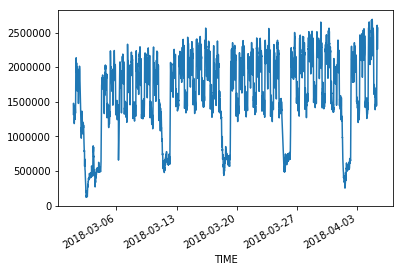

In [35]:
df['ACTIVEPOWER'].plot()

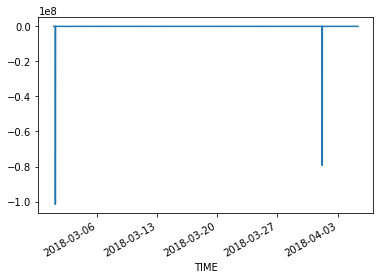

In [36]:
df['del_E'].plot()

In [37]:
df.shape

(3322, 5)

In [38]:
df.drop(('ID'), axis=1, inplace=True)

In [39]:
df.drop(('del_E'), axis=1, inplace=True)
df

,ACTIVEPOWER,REALTIME_E,METER_ID
TIME,,,
2018-03-01 00:00:00,1.318133e+06,1.518364e+09,3.0
2018-03-01 00:15:00,1.477733e+06,1.518718e+09,3.0
2018-03-01 00:30:00,1.471533e+06,1.519090e+09,3.0
2018-03-01 00:45:00,1.437533e+06,1.519455e+09,3.0
2018-03-01 01:00:00,1.333667e+06,1.519801e+09,3.0
2018-03-01 01:15:00,1.445800e+06,1.520144e+09,3.0
2018-03-01 01:30:00,1.437667e+06,1.520510e+09,3.0
2018-03-01 01:45:00,1.326600e+06,1.520861e+09,3.0
2018-03-01 02:00:00,1.282800e+06,1.521182e+09,3.0


In [40]:
df.drop(('METER_ID'), axis=1, inplace=True)
df.drop(('REALTIME_E'), axis=1, inplace=True)
df

,ACTIVEPOWER
TIME,
2018-03-01 00:00:00,1.318133e+06
2018-03-01 00:15:00,1.477733e+06
2018-03-01 00:30:00,1.471533e+06
2018-03-01 00:45:00,1.437533e+06
2018-03-01 01:00:00,1.333667e+06
2018-03-01 01:15:00,1.445800e+06
2018-03-01 01:30:00,1.437667e+06
2018-03-01 01:45:00,1.326600e+06
2018-03-01 02:00:00,1.282800e+06


In [41]:
df.shape

(3322, 1)

In [42]:
df['Hour'] = df.index.hour
df['Minute'] = df.index.minute
df['Weekday'] = df.index.weekday
df

,ACTIVEPOWER,Hour,Minute,Weekday
TIME,,,,
2018-03-01 00:00:00,1.318133e+06,0,0,3
2018-03-01 00:15:00,1.477733e+06,0,15,3
2018-03-01 00:30:00,1.471533e+06,0,30,3
2018-03-01 00:45:00,1.437533e+06,0,45,3
2018-03-01 01:00:00,1.333667e+06,1,0,3
2018-03-01 01:15:00,1.445800e+06,1,15,3
2018-03-01 01:30:00,1.437667e+06,1,30,3
2018-03-01 01:45:00,1.326600e+06,1,45,3
2018-03-01 02:00:00,1.282800e+06,2,0,3


In [43]:
shift_days = 1
shift_steps = shift_days * 96  # Number of hours.

In [44]:
df

,ACTIVEPOWER,Hour,Minute,Weekday
TIME,,,,
2018-03-01 00:00:00,1.318133e+06,0,0,3
2018-03-01 00:15:00,1.477733e+06,0,15,3
2018-03-01 00:30:00,1.471533e+06,0,30,3
2018-03-01 00:45:00,1.437533e+06,0,45,3
2018-03-01 01:00:00,1.333667e+06,1,0,3
2018-03-01 01:15:00,1.445800e+06,1,15,3
2018-03-01 01:30:00,1.437667e+06,1,30,3
2018-03-01 01:45:00,1.326600e+06,1,45,3
2018-03-01 02:00:00,1.282800e+06,2,0,3


In [45]:
df['ACTIVEPOWER'].head(shift_steps + 5)

TIME
2018-03-01 00:00:00    1.318133e+06
2018-03-01 00:15:00    1.477733e+06
2018-03-01 00:30:00    1.471533e+06
2018-03-01 00:45:00    1.437533e+06
2018-03-01 01:00:00    1.333667e+06
2018-03-01 01:15:00    1.445800e+06
2018-03-01 01:30:00    1.437667e+06
2018-03-01 01:45:00    1.326600e+06
2018-03-01 02:00:00    1.282800e+06
2018-03-01 02:15:00    1.184400e+06
2018-03-01 02:30:00    1.189333e+06
2018-03-01 02:45:00    1.262333e+06
2018-03-01 03:00:00    1.276133e+06
2018-03-01 03:15:00    1.293133e+06
2018-03-01 03:30:00    1.335467e+06
2018-03-01 03:45:00    1.387800e+06
2018-03-01 04:00:00    1.298733e+06
2018-03-01 04:15:00    1.245200e+06
2018-03-01 04:30:00    1.268933e+06
2018-03-01 04:45:00    1.391733e+06
2018-03-01 05:00:00    1.402533e+06
2018-03-01 05:15:00    1.401800e+06
2018-03-01 05:30:00    1.356867e+06
2018-03-01 05:45:00    1.334933e+06
2018-03-01 06:00:00    1.437733e+06
2018-03-01 06:15:00    1.545600e+06
2018-03-01 06:30:00    1.870267e+06
2018-03-01 06:45:00    

In [46]:
df_targets = df['ACTIVEPOWER'].shift(-shift_steps)
df_targets

#Check it again, shifting is wrong so think about it once

TIME
2018-03-01 00:00:00    1.120800e+06
2018-03-01 00:15:00    1.162333e+06
2018-03-01 00:30:00    1.131000e+06
2018-03-01 00:45:00    1.120267e+06
2018-03-01 01:00:00    1.037200e+06
2018-03-01 01:15:00    9.954000e+05
2018-03-01 01:30:00    9.146000e+05
2018-03-01 01:45:00    8.557333e+05
2018-03-01 02:00:00    8.160667e+05
2018-03-01 02:15:00    7.928000e+05
2018-03-01 02:30:00    7.789333e+05
2018-03-01 02:45:00    7.962667e+05
2018-03-01 03:00:00    7.288667e+05
2018-03-01 03:15:00    5.668000e+05
2018-03-01 03:30:00    6.724667e+05
2018-03-01 03:45:00    6.674667e+05
2018-03-01 04:00:00    5.719333e+05
2018-03-01 04:15:00    5.256667e+05
2018-03-01 04:30:00    5.097333e+05
2018-03-01 04:45:00    4.979333e+05
2018-03-01 05:00:00    4.324000e+05
2018-03-01 05:15:00    4.180000e+05
2018-03-01 05:30:00    2.600000e+05
2018-03-01 05:45:00    1.871333e+05
2018-03-01 06:00:00    1.994000e+05
2018-03-01 06:15:00    2.130667e+05
2018-03-01 06:30:00    1.609333e+05
2018-03-01 06:45:00    

In [47]:
df_targets.tail()

TIME
2018-04-05 08:00:00   NaN
2018-04-05 08:15:00   NaN
2018-04-05 08:30:00   NaN
2018-04-05 08:45:00   NaN
2018-04-05 09:00:00   NaN
Name: ACTIVEPOWER, dtype: float64

In [48]:
x_data = df.values[0:-shift_steps]

In [49]:
x_data
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (3226, 4)


In [50]:
y_data = df_targets.values[:-shift_steps]

In [51]:
y_data
print(type(y_data))
print("Shape:", y_data.shape)
y_data = np.array(y_data).reshape((len(y_data), 1))

<class 'numpy.ndarray'>
Shape: (3226,)


In [52]:
num_data = len(x_data)
num_data

3226

In [53]:
train_split = 0.9
num_train = int(train_split * num_data)
num_train

2903

In [54]:
num_test = num_data - num_train
num_test

323

In [55]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

3226

In [56]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

3226

In [57]:
num_x_signals = x_data.shape[1]
num_x_signals

4

In [58]:
num_y_signals = y_data.shape[1]
num_y_signals

1

In [59]:
x_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(x_train)

In [60]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0


In [61]:
x_test_scaled = x_scaler.transform(x_test)

In [62]:
print (y_train.shape)
y_train = np.array(y_train).reshape((len(y_train), 1))
y_test = np.array(y_test).reshape((len(y_test), 1))
print (y_train.shape)
y_test.shape

(2903, 1)
(2903, 1)


(323, 1)

In [63]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [64]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(2903, 4)
(2903, 1)


In [65]:
def batch_generator(batch_size, sequence_length):

    # Infinite loop.
    while True:
        
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [66]:
batch_size = 75

In [67]:
sequence_length = 96 * 7 * 1/2
sequence_length = (int) (sequence_length)
sequence_length

336

In [68]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [69]:
x_batch, y_batch = next(generator)

In [70]:
print(x_batch.shape)
print(y_batch.shape)

(75, 336, 4)
(75, 336, 1)


[0.4863 0.5024 0.5024 0.4885 0.4683 0.4636 0.5986 0.736  0.8364 0.8765
 0.908  0.9014 0.8853 0.8623 0.817  0.8237 0.9043 0.926  0.848  0.823
 0.8447 0.8374 0.8066 0.808  0.8096 0.779  0.7046 0.729  0.7153 0.766
 0.755  0.8057 0.7725 0.7764 0.8135 0.791  0.755  0.6963 0.682  0.6973
 0.771  0.794  0.8145 0.82   0.9185 0.893  0.842  0.8223 0.819  0.8643
 0.899  0.903  0.91   0.916  0.895  0.8633 0.819  0.784  0.7666 0.736
 0.729  0.717  0.809  0.883  0.819  0.8145 0.8115 0.8267 0.734  0.619
 0.5024 0.5273 0.5703 0.6245 0.6187 0.6045 0.5747 0.5723 0.5654 0.532
 0.553  0.545  0.567  0.5444 0.5156 0.4858 0.4548 0.4814 0.524  0.532
 0.5225 0.55   0.5415 0.583  0.5767 0.5454 0.5693 0.591  0.588  0.5933
 0.555  0.5464 0.56   0.744  0.847  0.845  0.8594 0.8696 0.911  0.899
 0.858  0.865  0.944  0.9453 0.8857 0.8745 0.89   0.927  0.8433 0.8286
 0.834  0.7734 0.7754 0.7764 0.7944 0.8696 0.8423 0.853  0.8223 0.848
 0.8853 0.8984 0.8345 0.7754 0.7046 0.756  0.8315 0.849  0.877  0.8975
 0.9087 0.93  

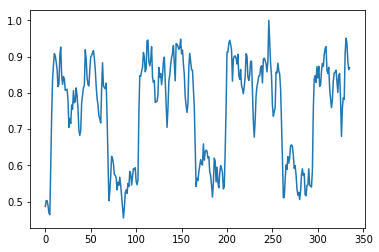

In [71]:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 3 input-signals.
seq = x_batch[batch, :, signal]
print (seq)
plt.plot(seq)

[0.5693 0.591  0.588  0.5933 0.555  0.5464 0.56   0.744  0.847  0.845
 0.8594 0.8696 0.911  0.899  0.858  0.865  0.944  0.9453 0.8857 0.8745
 0.89   0.927  0.8433 0.8286 0.834  0.7734 0.7754 0.7764 0.7944 0.8696
 0.8423 0.853  0.8223 0.848  0.8853 0.8984 0.8345 0.7754 0.7046 0.756
 0.8315 0.849  0.877  0.8975 0.9087 0.93   0.879  0.833  0.9355 0.9336
 0.928  0.9194 0.9253 0.9478 0.907  0.9175 0.8804 0.8506 0.789  0.7637
 0.7456 0.7695 0.872  0.9087 0.8853 0.8633 0.8623 0.812  0.7607 0.6455
 0.5415 0.564  0.558  0.5825 0.598  0.6157 0.604  0.601  0.659  0.6143
 0.636  0.642  0.6387 0.6196 0.6235 0.582  0.571  0.5454 0.512  0.552
 0.6196 0.6113 0.554  0.5947 0.553  0.538  0.5776 0.599  0.5913 0.58
 0.5347 0.541  0.6387 0.759  0.912  0.9116 0.937  0.945  0.933  0.919
 0.832  0.893  0.9004 0.902  0.8955 0.8794 0.9062 0.8467 0.837  0.8643
 0.82   0.811  0.7974 0.817  0.8447 0.9077 0.902  0.8438 0.834  0.8496
 0.8867 0.887  0.8076 0.721  0.6777 0.7236 0.7915 0.818  0.83   0.846
 0.8467 0.867

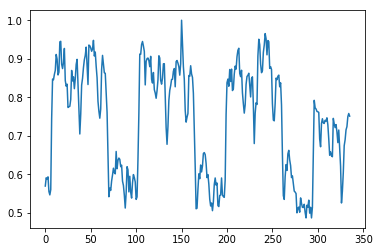

In [72]:
seq = y_batch[batch, :, signal]
print (seq)
plt.plot(seq)

In [73]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [74]:
model = Sequential()

In [75]:
model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(None, num_x_signals,)))


In [76]:
model.add(Dense(num_y_signals, activation='sigmoid'))

In [77]:
if False:
    from tensorflow.python.keras.initializers import RandomUniform

    # Maybe use lower init-ranges.
    init = RandomUniform(minval=-0.05, maxval=0.05)

    model.add(Dense(num_y_signals,
                    activation='linear',
                    kernel_initializer=init))

In [78]:
warmup_steps = 20

In [79]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)
    
    print ("loss is ")
    print (loss)
    
    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

In [80]:
optimizer = RMSprop(lr=1e-3)

In [81]:
model.compile(loss=loss_mse_warmup, optimizer=optimizer)

loss is 
Tensor("loss/dense_1_loss/mean_squared_error/value:0", shape=(), dtype=float32)


In [82]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, None, 512)         794112    
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           513       
Total params: 794,625
Trainable params: 794,625
Non-trainable params: 0
_________________________________________________________________


In [83]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [84]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [85]:
callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

In [86]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [87]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [88]:
%%time
model.fit_generator(generator=generator,
                    epochs=20,
                    steps_per_epoch=100,
                    validation_data=validation_data,
                    callbacks=callbacks)

Epoch 1/20
 99/100 [============================>.] - ETA: 6s - loss: 0.0350 
Epoch 00001: val_loss improved from inf to 0.01854, saving model to 23_checkpoint.keras
100/100 [==============================] - 663s 7s/step - loss: 0.0350 - val_loss: 0.0185
Epoch 2/20
 99/100 [============================>.] - ETA: 6s - loss: 0.0257 
Epoch 00002: val_loss improved from 0.01854 to 0.01765, saving model to 23_checkpoint.keras
100/100 [==============================] - 677s 7s/step - loss: 0.0257 - val_loss: 0.0176
Epoch 3/20
 99/100 [============================>.] - ETA: 6s - loss: 0.0208 
Epoch 00003: val_loss improved from 0.01765 to 0.01175, saving model to 23_checkpoint.keras
100/100 [==============================] - 666s 7s/step - loss: 0.0208 - val_loss: 0.0118
Epoch 4/20
 99/100 [============================>.] - ETA: 6s - loss: 0.0150 
Epoch 00004: val_loss did not improve

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
100/100 [=================

In [89]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [90]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 1s 519ms/step


In [91]:
print("loss (test-set):", result)

loss (test-set): 0.004682071506977081


In [92]:
# If you have several metrics you can use this instead.
if False:
    for res, metric in zip(result, model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

In [93]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(1):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel('ACTIVEPOWER')
        plt.legend()
        plt.show()

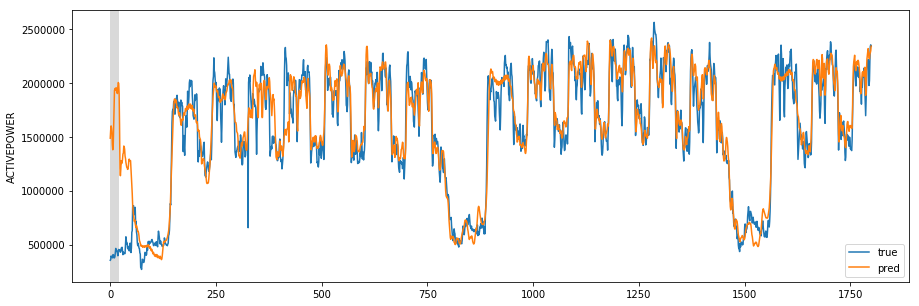

In [96]:
plot_comparison(start_idx=50, length=1800, train=True)

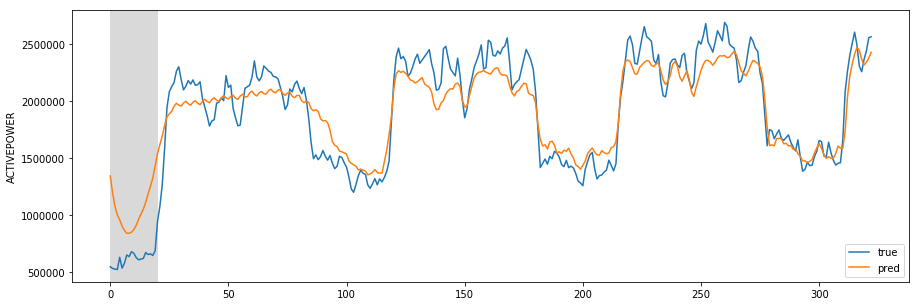

In [104]:
plot_comparison(start_idx=0, length=326, train=False)